In [2]:
import pandas as pd

In [3]:
# 1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)
df = pd.read_csv('batting.csv')

In [4]:
# 2)	Print out the dimensions and info about the dataframe you just created
df.shape

(102816, 25)

In [5]:
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [245]:
# 3)	How many players have hit 40 or more HRs in one single season? (Number only)
hr = df.groupby(['yearID','playerID']).HR.sum()
hr40 = hr[hr>=40].index.get_level_values(1).nunique()
hr40

142

In [247]:
#*** 4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)
carhr = df.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
carhr600 = carhr[carhr>=600].to_frame().reset_index().iloc[:,1:]
carhr600

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


In [8]:
# 5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)
splyr = df.groupby(['yearID','playerID'])[['2B','3B','H','HR']].sum()
splyr[(splyr['2B']>10)&(splyr['3B']>10)&(splyr['H']>200)&(splyr['HR']>30)].index.get_level_values(1).nunique()

10

In [9]:
# 6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )
sb = df.groupby(['playerID','nameFirst','nameLast','yearID'])['SB'].sum()
sb100 = sb[sb>=100].sort_values(ascending=False).to_frame().reset_index().iloc[:,1:]
sb100

,nameFirst,nameLast,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,Billy,Hamilton,1891,111.0
6,John,Ward,1887,111.0
7,Billy,Hamilton,1889,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


In [313]:
# 7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)
df60s = df[(df['yearID']>=1960) & (df['yearID']<=1969)]
hrsum = df60s.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
hr200 = hrsum[hrsum>=200]
hr200.to_frame().reset_index().iloc[:,1:].sort_values(by='HR',ascending=False).reset_index().drop('index',axis=1)

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


In [11]:
# 8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)
df.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().sort_values(ascending=False).head(1).to_frame().reset_index().iloc[:,1:]

,nameFirst,nameLast,HR
0,Barry,Bonds,762


In [12]:
# 9)	Who had the most hits (H) in the 1970s? (Dataframe)
df70s = df[(df['yearID']>=1970) & (df['yearID']<=1979)]
mostH = df70s.groupby(['playerID','nameFirst','nameLast'])['H'].sum().sort_values(ascending=False).head(1).to_frame().reset_index().iloc[:,1:]
mostH

,nameFirst,nameLast,H
0,Pete,Rose,2045


In [69]:
# 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)
dfg = df.groupby(['yearID','playerID']).sum()
dfg['OBP'] = (dfg['H']+dfg['BB']+dfg['HBP'])/(dfg['AB']+dfg['BB']+dfg['HBP']+dfg['SF'])
dfg['PA'] = dfg['AB']+dfg['BB']+dfg['HBP']+dfg['SH']+dfg['SF']


In [71]:
dfgrpd = dfg.reset_index()
dfgrpd['OBP'] = round(dfgrpd['OBP'],3)
df77 = dfgrpd[dfgrpd['yearID']==1977]
df77
hOBP = df77.groupby('playerID')['OBP','PA'].sum()
hOBP500PA = hOBP[hOBP['PA']>=500]
top5 = hOBP500PA['OBP'].sort_values(ascending=False).head(5).reset_index()
dfnames = df.groupby(['playerID','nameFirst','nameLast']).sum().reset_index().iloc[:,:3]
merged = pd.merge(top5,dfnames,on='playerID')
merged[['nameFirst','nameLast','OBP']]


,nameFirst,nameLast,OBP
0,Rod,Carew,0.449
1,Ken,Singleton,0.438
2,Reggie,Smith,0.427
3,Mike,Hargrove,0.420
4,Joe,Morgan,0.417


In [314]:
# 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)
dfgrpd['BA'] = round((dfgrpd['H']/dfgrpd['AB']),3)
pa300 = dfgrpd[dfgrpd['PA']>=300]
top8 = pa300[['playerID','BA']].sort_values(by='BA',ascending=False).head(8)
top8
merged = pd.merge(top8,dfnames,on='playerID')
merged[['nameFirst','nameLast','BA']].sort_values(by='BA',ascending=False).reset_index().drop('index',axis=1)

,nameFirst,nameLast,BA
0,Tony,Gwynn,0.394
1,George,Brett,0.390
2,Rod,Carew,0.388
3,Ted,Williams,0.388
4,Larry,Walker,0.379
5,Tony,Gwynn,0.372
6,Nomar,Garciaparra,0.372
7,Todd,Helton,0.372


In [315]:
# 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)
dfg40s = dfgrpd[(dfgrpd['yearID']>=1940)&(dfgrpd['yearID']<=1949)]
dfg40sort = dfg40s.groupby('yearID',as_index=False)['playerID','H'].max()
dfnames.merge(dfg40sort,on='playerID').sort_values(by='yearID')[['nameFirst','nameLast','H','yearID']].reset_index().drop('index',axis=1)

,nameFirst,nameLast,H,yearID
0,Bill,Zuber,200,1940
1,Bill,Zuber,218,1941
2,Bill,Zuber,205,1942
3,Bill,Zuber,220,1943
4,Bill,Zuber,205,1944
5,Bill,Zuber,224,1945
6,Bill,Zuber,228,1946
7,Bill,Zuber,207,1947
8,Sam,Zoldak,230,1948
9,Sam,Zoldak,207,1949


In [262]:
# 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)
mlbL = df.groupby(['yearID','playerID'])['H'].sum().to_frame().reset_index().groupby(['yearID']).max()
mlbLsort = mlbL.groupby('playerID').agg(['sum','count']).reset_index()
mlbLsort.sort_values([('H','count')], ascending=False).head(1).merge(dfnames,on='playerID').iloc[:,2:6]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(H, sum)","(H, count)",nameFirst,nameLast
0,3846,18,Chief,Zimmer


In [18]:
# 14)	Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe
df.groupby(['playerID','nameFirst','nameLast'])['G'].sum().sort_values(ascending=False).head().to_frame().reset_index().iloc[:,1:4]

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


In [19]:
# 15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here
plyrs = df.groupby(['playerID'])['H','HR'].sum()
plyrs[(plyrs['H']>=3000)&(plyrs['HR']>=500)].shape[0]

5

In [20]:
# 16)	How many HRs were hit during the entire 1988 season?  Just a number is okay here
df[df['yearID']==1988]['HR'].sum()

3180

In [21]:
# 17)	Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average
WBid = df[(df['nameFirst']=='Wade')&(df['nameLast']=='Boggs')]['playerID'].iloc[0]
WBavg = dfgrpd[(dfgrpd['playerID']==WBid)].groupby(['yearID','playerID'])['BA','AB'].sum()
WBtop3 = WBavg[WBavg['AB']>=500].sort_values(by='BA',ascending=False).head(3).reset_index()
dfnames.merge(WBtop3,on='playerID')[['nameFirst','nameLast','BA']]


,nameFirst,nameLast,BA
0,Wade,Boggs,0.368
1,Wade,Boggs,0.366
2,Wade,Boggs,0.363


In [316]:
# 18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP
dfnames.merge((dfgrpd[(dfgrpd['yearID']==1995)&(dfgrpd['PA']>=400)][['playerID','OBP']].sort_values(by='OBP',ascending=False).head(10)),on='playerID').iloc[:,1:4].sort_values(by='OBP',ascending=False).reset_index().drop('index',axis=1)

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.479
1,Frank,Thomas,0.454
2,Mark,McGwire,0.441
3,Jim,Thome,0.438
4,Barry,Bonds,0.431
5,Chili,Davis,0.429
6,Tim,Salmon,0.429
7,Dave,Magadan,0.428
8,Chuck,Knoblauch,0.424
9,Tim,Naehring,0.415


In [23]:
# 19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs
dfnames.merge((dfgrpd[dfgrpd['yearID'].isin([1922,1925,1926,1928])][['playerID','3B']].groupby('playerID').sum().reset_index().sort_values(by='3B',ascending=False).head(1)),on='playerID').iloc[:,1:4]

,nameFirst,nameLast,3B
0,Curt,Walker,59


In [24]:
# 20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here
dfgrpd[(dfgrpd['HR']>=30)&(dfgrpd['SB']>=30)]['playerID'].nunique()

38

In [25]:
# 21)	Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)
dfnames.merge((dfgrpd[(dfgrpd['yearID']==1986)&(dfgrpd['AB']>=400)][['playerID','OBP']].nlargest(1,columns='OBP')),on='playerID').iloc[:,1:4]


,nameFirst,nameLast,OBP
0,Wade,Boggs,0.453


In [238]:
# 22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)
nl97df = df[(df['lgID']=='NL')&(df['yearID']==1997)&(df['AB']>=400)].groupby(['yearID','playerID']).sum()
nl97df['OBP'] = (nl97df['H']+nl97df['BB']+nl97df['HBP'])/(nl97df['AB']+nl97df['BB']+nl97df['HBP']+nl97df['SF'])
dfnames.merge((nl97df['OBP'].nlargest(1).to_frame().reset_index()),on='playerID')[['nameFirst','nameLast','OBP']]


,nameFirst,nameLast,OBP
0,Larry,Walker,0.451807


In [280]:
# 23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)
dfhr12 = df[(df['yearID']==2012)&(df['AB']>=500)].groupby(['lgID','playerID'],as_index=False)['HR'].sum()
dfhr12_AL = dfhr12[dfhr12['lgID']=='AL']
dfhr12_AL['avgHR'] = dfhr12_AL['HR'].mean()
dfhr12_NL = dfhr12[dfhr12['lgID']=='NL']
dfhr12_NL['avgHR'] = dfhr12_NL['HR'].mean()
dfhr12_AL
dfhrnew = pd.concat([dfhr12_AL,dfhr12_NL])
merged = dfnames.merge((dfhrnew[dfhrnew['HR']>dfhrnew['avgHR']].sort_values(by='HR',ascending=False)[['playerID','HR']]),on='playerID').iloc[:,1:4].sort_values(by='HR',ascending=False)
merged.reset_index().drop('index',axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Josh,Hamilton,43
2,Curtis,Granderson,43
3,Edwin,Encarnacion,42
4,Adam,Dunn,41
5,Ryan,Braun,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Chris,Davis,33


In [116]:
# 24)	Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)
dfyng = df.groupby(['yearID','playerID','nameFirst','nameLast'],as_index=False).sum()
dfyng['AGE'] = dfyng['yearID']-dfyng['birthYear']
df0_100 = dfyng[dfyng['HR']>=50]
df0_100[(df0_100['AGE']>=0)&(df0_100['AGE']<=100)].sort_values(by='AGE').head(1)[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
82621,Prince,Fielder,50,2007


In [167]:
# 25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)
df1 = df.copy()

In [269]:
df1['Age']=df1['yearID']-df1['birthYear']
df5yng300 = df1[['playerID','nameFirst','nameLast','yearID','stint','HR','Age']]
dfnew=df5yng300.groupby(['yearID','playerID'],as_index=False)['HR'].sum()
dfnew['cumHR'] = dfnew.groupby('playerID')['HR'].cumsum()
dfnew['Age'] = df1.groupby(['yearID','playerID','Age'],as_index=False).sum()['Age']
dflast = dfnew[(dfnew['cumHR']>=300)&(dfnew['Age']>0)].sort_values(['Age','cumHR'],ascending=[True,False]).head()[['playerID','yearID']]
dflast.merge(dfnames,on='playerID')[['nameFirst','nameLast','yearID']]

,nameFirst,nameLast,yearID
0,Alex,Rodriguez,2003
1,Albert,Pujols,2008
2,Mel,Ott,1937
3,Jimmie,Foxx,1935
4,Andruw,Jones,2005


In [287]:
# BONUS	Graph total HRs per season using bar graph
import matplotlib.pyplot as plt
%matplotlib inline

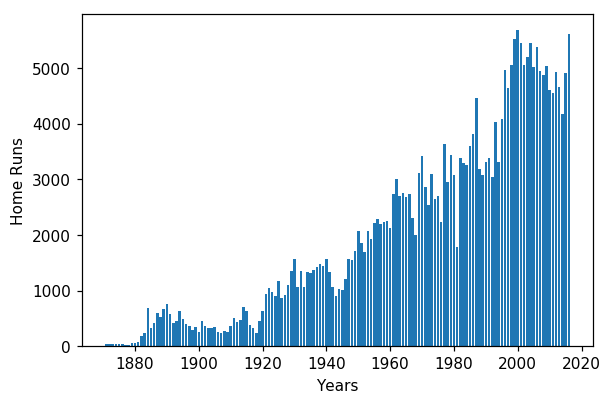

In [307]:
dfgrph = df.groupby(['yearID'], as_index= False).sum()
dfgrph
plt.figure(dpi=110)
plt.bar(dfgrph['yearID'], dfgrph['HR'])
plt.xlabel('Years')
plt.ylabel('Home Runs')
plt.show()

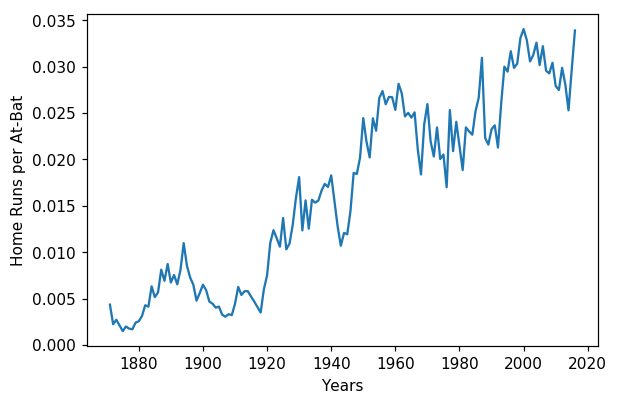

In [308]:
# BONUS	Using a line graph please graph the average HRs per AB (think about this) per season
dfg2 = df.groupby(['yearID'], as_index= False).sum()
dfg2['HR/AB'] = dfg2['HR']/dfg2['AB']
plt.figure(dpi=110)
plt.plot(dfg2['yearID'], dfg2['HR/AB'])
plt.xlabel('Years')
plt.ylabel('Home Runs per At-Bat')
plt.show()